## Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

c:\users\abc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\datasets\_openml.py:57: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


In [3]:
x, y = mnist['data'], mnist['target']

In [6]:
x.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
%matplotlib inline

In [9]:
import matplotlib
import matplotlib.pyplot as plt

In [10]:
some_digit = x[3601]
some_digit_image = some_digit.reshape(28, 28) # lets reshape it to plot it

(-0.5, 27.5, 27.5, -0.5)

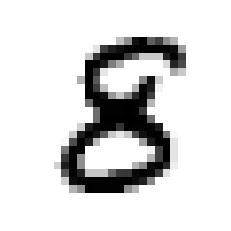

In [14]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [15]:
y[3601]

'8'

In [16]:
x_train, x_test = x[0:6000], x[6000:7000]

In [17]:
y_train, y_test = y[0:6000], y[6000:7000]

In [18]:
import numpy as np
shuffle_index = np.random.permutation(6000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

## Creating a 2 detector

In [19]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [20]:
y_train

array([8, 2, 8, ..., 1, 5, 1], dtype=int8)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
clf = LogisticRegression(tol = 0.1, solver='lbfgs')

In [23]:
clf.fit(x_train, y_train_2)

c:\users\abc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(tol=0.1)

In [24]:
clf.predict([some_digit])

array([False])

In [26]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")

c:\users\abc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\abc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

In [27]:
a.mean()

0.9573333333333333

In [28]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train, y_train_2, cv=3)

c:\users\abc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\abc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

In [29]:
y_train_pred

array([False, False,  True, ..., False, False, False])

## Calculating confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_train_2, y_train_pred)

array([[5281,  138],
       [ 118,  463]], dtype=int64)

In [32]:
confusion_matrix(y_train_2, y_train_2) # This is the confusion matrix for perfect predictions

array([[5419,    0],
       [   0,  581]], dtype=int64)

## Precision and Recall

In [33]:
from sklearn.metrics import precision_score, recall_score

In [34]:
precision_score(y_train_2, y_train_pred) # This is my precision score

0.7703826955074875

In [35]:
recall_score(y_train_2, y_train_pred) # This is my recall score

0.7969018932874354

## F1 - Score

In [37]:
from sklearn.metrics import f1_score

In [38]:
f1_score(y_train_2, y_train_pred)

0.7834179357021995

## Precision Recall Curve

In [39]:
from sklearn.metrics import precision_recall_curve

In [40]:
y_scores = cross_val_predict(clf, x_train, y_train_2, cv=3, method="decision_function")

c:\users\abc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\abc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

In [41]:
y_scores

array([ -57.83521397,  -45.39206187,   15.36684624, ...,  -43.69209412,
       -165.08628955,  -22.34983533])

In [42]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

In [43]:
precisions

array([0.10445883, 0.10429779, 0.10431655, ..., 1.        , 1.        ,
       1.        ])

In [44]:
recalls

array([1.        , 0.99827883, 0.99827883, ..., 0.00344234, 0.00172117,
       0.        ])

In [45]:
thresholds

array([-208.53848381, -208.3498569 , -208.14486959, ...,  182.0685765 ,
        185.51441773,  187.92853806])

## Plotting the Precision Recall Curve

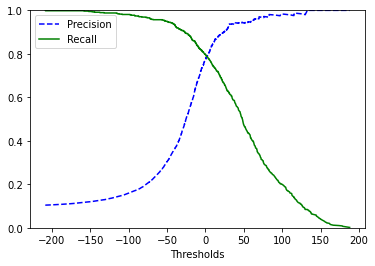

In [46]:
plt.plot(thresholds, precisions[:-1],"b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()